In [25]:
using LinearAlgebra
using Plots

# *Case 1*

In [26]:
x = 1/49
print(x)

0.02040816326530612

In [27]:
x = x * 49
print(x)

0.9999999999999999

In [28]:
Approx = x
TrueValue = 1

1

In [29]:
Et = TrueValue - Approx
println("True Error = $Et")
println("True Relative Error = $((Et/TrueValue) * 100)")

True Error = 1.1102230246251565e-16
True Relative Error = 1.1102230246251565e-14


# *Case 2*

In [30]:
a = 0.1
b = a + a + a
println(b == 0.3)

false


In [31]:
TrueValue = 0.3
Approx = b 
Et = TrueValue - Approx
println("True Error = $Et")
println("True Relative Error = $(abs((Et/TrueValue)) * 100)")

True Error = -5.551115123125783e-17
True Relative Error = 1.8503717077085944e-14


In [32]:
large_number = 1e8
small_increment = 1e-8
n_steps = 1000

theoretical = large_number .+ (1 :n_steps) .* small_increment
actual = fill(large_number, n_steps)
for i in 2:n_steps
    actual[i] = actual[i - 1] + small_increment
end

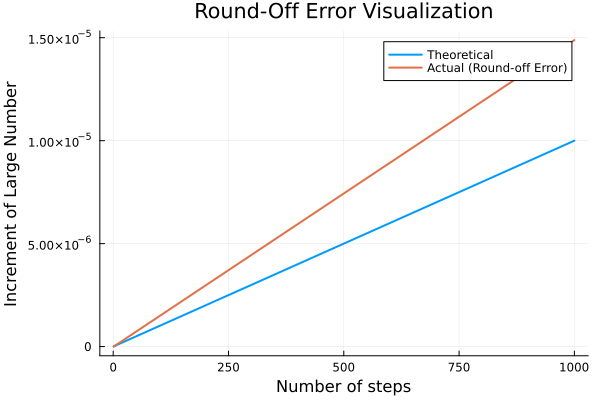

In [33]:
using Plots

plot(1:n_steps, theoretical .- large_number, label="Theoretical", 
    xlabel="Number of steps", ylabel="Increment of Large Number", 
    title="Round-Off Error Visualization", linewidth=2, legend=:topright, grid=true)

plot!(1:n_steps, actual .- large_number, label="Actual (Round-off Error)", linewidth=2)

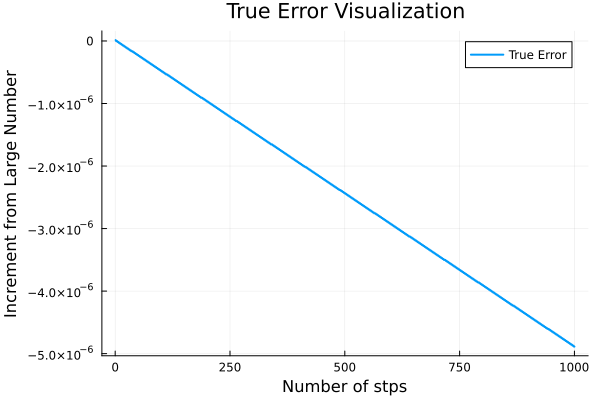

attempt to save state beyond implementation limit


In [41]:
p = plot(1:n_steps, theoretical .- actual, label = "True Error", xlabel="Number of stps", ylabel="Increment from Large Number", title = "True Error Visualization", linewidth=2, legend=:topright,gird=true)
display(p)

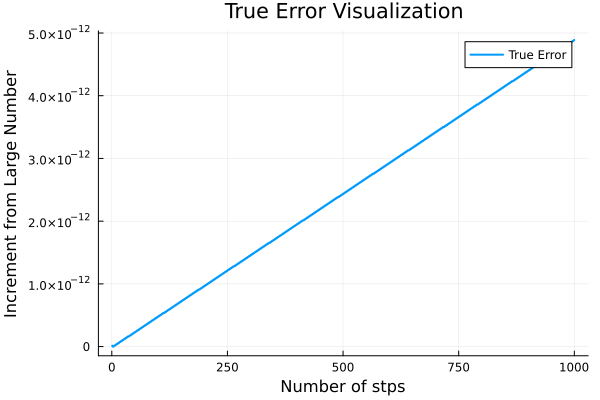

In [42]:
plot(1:n_steps, abs.((theoretical.-actual)./theoretical) .*100, label = "True Error", xlabel="Number of stps", ylabel="Increment from Large Number", title = "True Error Visualization", linewidth=2, legend=:topright,grid=true)

In [36]:
function factorial(x)
    value = 1
    for i in 1:x
        value *= i
    end
    return value
end

factorial (generic function with 1 method)

In [37]:
function taylor_exp(x, n_terms)
    approximation = zero.(x)
    for n in 0:n_terms-1
        approximation .+= (x .^ n) ./ factorial(big(n))
    end
    return approximation
end

taylor_exp (generic function with 1 method)

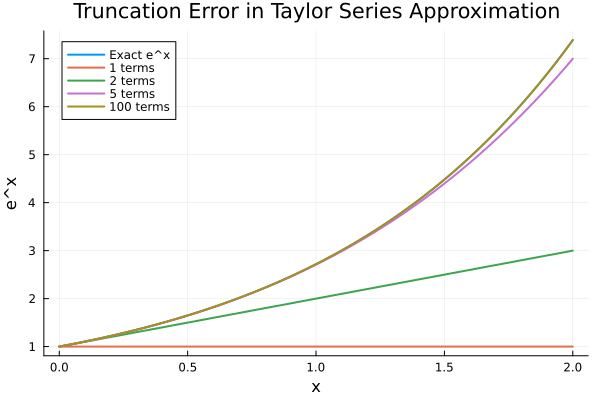

In [38]:
using Plots
x = LinRange(0, 2, 100)
exact = exp.(x)
n_terms_list = [1, 2, 5, 100]


p = plot(x, exact, label="Exact e^x", title="Truncation Error in Taylor Series Approximation", xlabel="x", ylabel="e^x", linewidth=2, grid=true)
for n_terms in n_terms_list
    approx = taylor_exp(x, n_terms)
    plot!(p, x, approx, label = "$n_terms terms", linewidth=2)
end
display(p)